In [79]:
#@title [KNN] Assignment
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [80]:
#@title 1.Glass Dataset

In [81]:
data=pd.read_csv('/content/glass.csv')
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [82]:
#@title Performing EDA

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [84]:
data.shape

(214, 10)

In [85]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [86]:
data.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [87]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [88]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [89]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [90]:
data=data.drop([39])

In [91]:
data[data.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [92]:
#@title Visualization

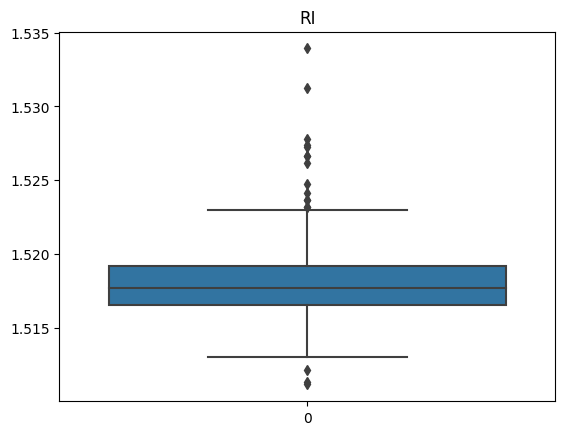

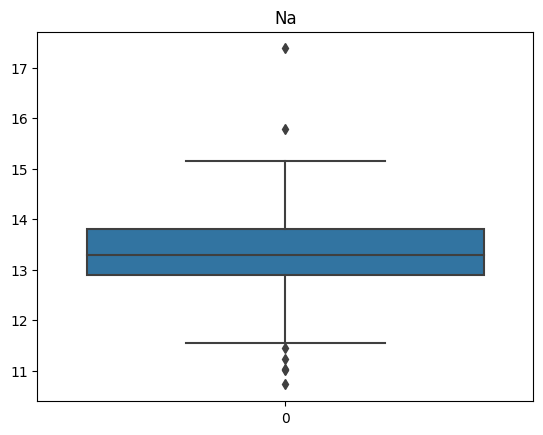

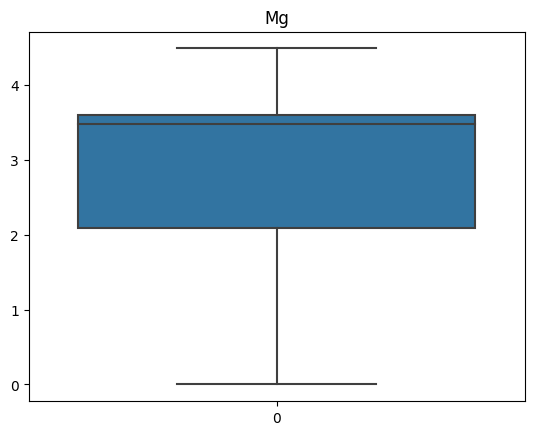

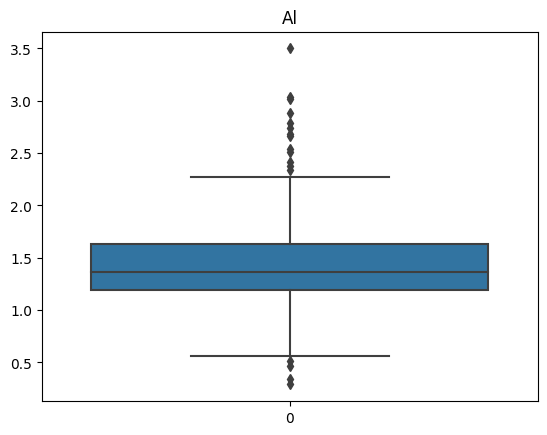

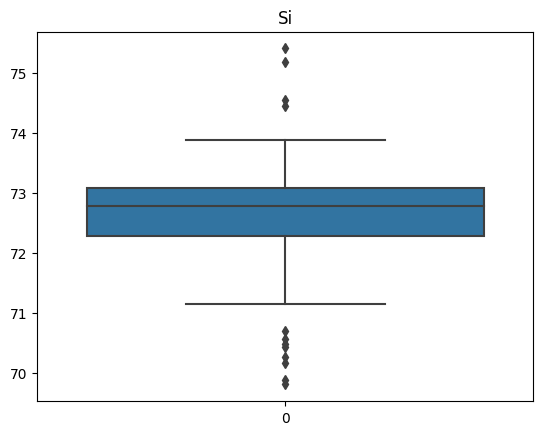

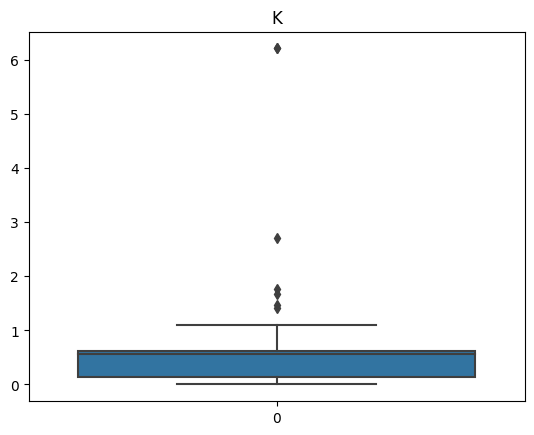

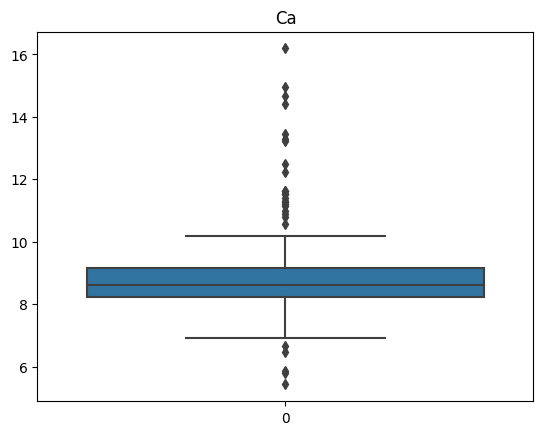

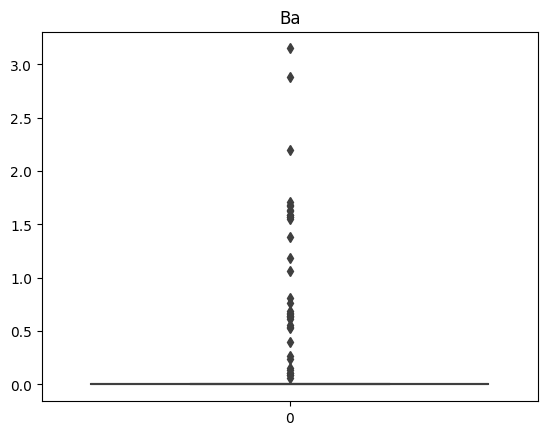

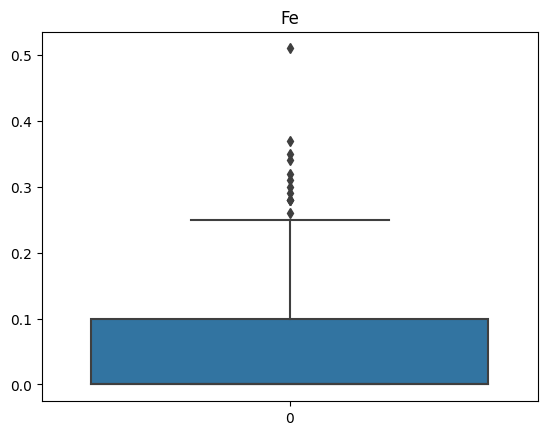

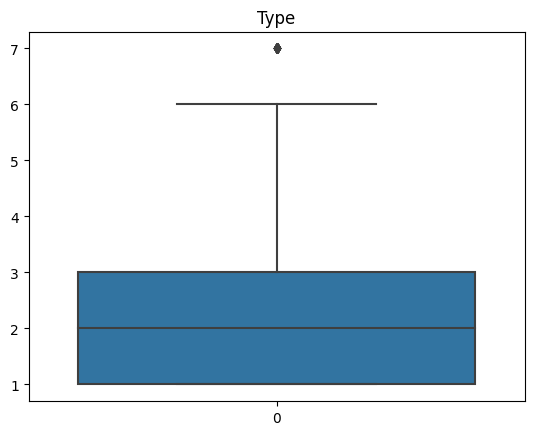

In [93]:
import seaborn as sns
for i in data.columns:
  plt.title(i)
  sns.boxplot(data[i])
  plt.show()

array([[<Axes: title={'center': 'RI'}>, <Axes: title={'center': 'Na'}>,
        <Axes: title={'center': 'Mg'}>],
       [<Axes: title={'center': 'Al'}>, <Axes: title={'center': 'Si'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'Ca'}>, <Axes: title={'center': 'Ba'}>,
        <Axes: title={'center': 'Fe'}>],
       [<Axes: title={'center': 'Type'}>, <Axes: >, <Axes: >]],
      dtype=object)

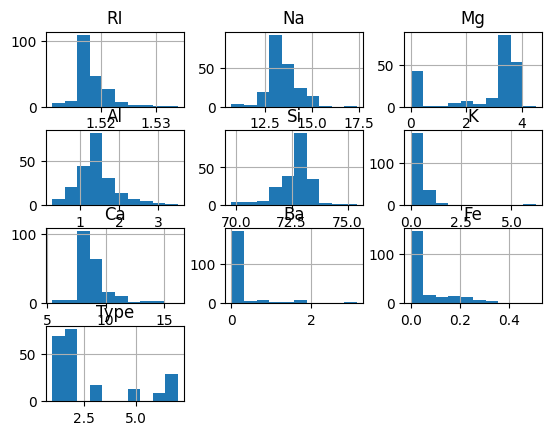

In [94]:
data.hist()

In [95]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.198802,-0.127526,-0.400973,-0.539000,-0.287645,0.811183,0.001679,0.147083,-0.160140
Na,-0.198802,1.000000,-0.278420,0.167735,-0.064885,-0.264158,-0.278194,0.329080,-0.239374,0.508837
Mg,-0.127526,-0.278420,1.000000,-0.479575,-0.162437,0.007617,-0.446197,-0.491818,0.085426,-0.744195
Al,-0.400973,0.167735,-0.479575,1.000000,-0.016195,0.323683,-0.258068,0.480642,-0.080583,0.597432
Si,-0.539000,-0.064885,-0.162437,-0.016195,1.000000,-0.197281,-0.207145,-0.104389,-0.097717,0.147725
K,-0.287645,-0.264158,0.007617,0.323683,-0.197281,1.000000,-0.317032,-0.043653,-0.009372,-0.012455
Ca,0.811183,-0.278194,-0.446197,-0.258068,-0.207145,-0.317032,1.000000,-0.112208,0.126314,0.002677
Ba,0.001679,0.329080,-0.491818,0.480642,-0.104389,-0.043653,-0.112208,1.000000,-0.059729,0.574896
Fe,0.147083,-0.239374,0.085426,-0.080583,-0.097717,-0.009372,0.126314,-0.059729,1.000000,-0.191090
Type,-0.160140,0.508837,-0.744195,0.597432,0.147725,-0.012455,0.002677,0.574896,-0.191090,1.000000


<Axes: >

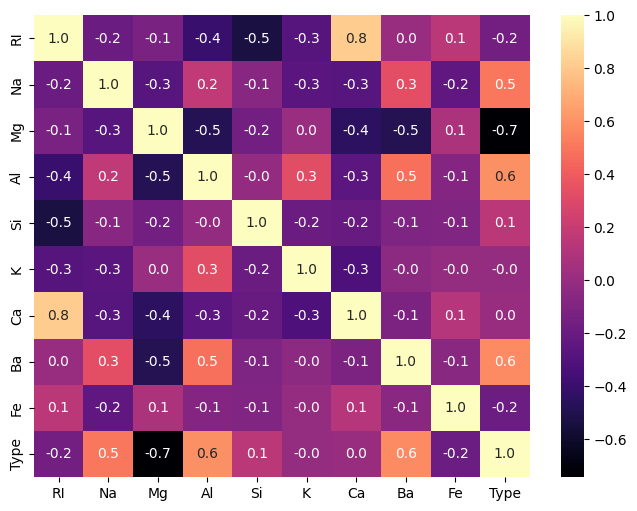

In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='magma',annot=True,fmt='.1f')

<Axes: >

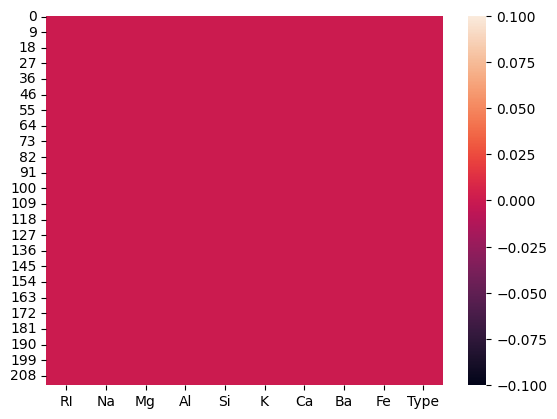

In [97]:
sns.heatmap(data.isna())

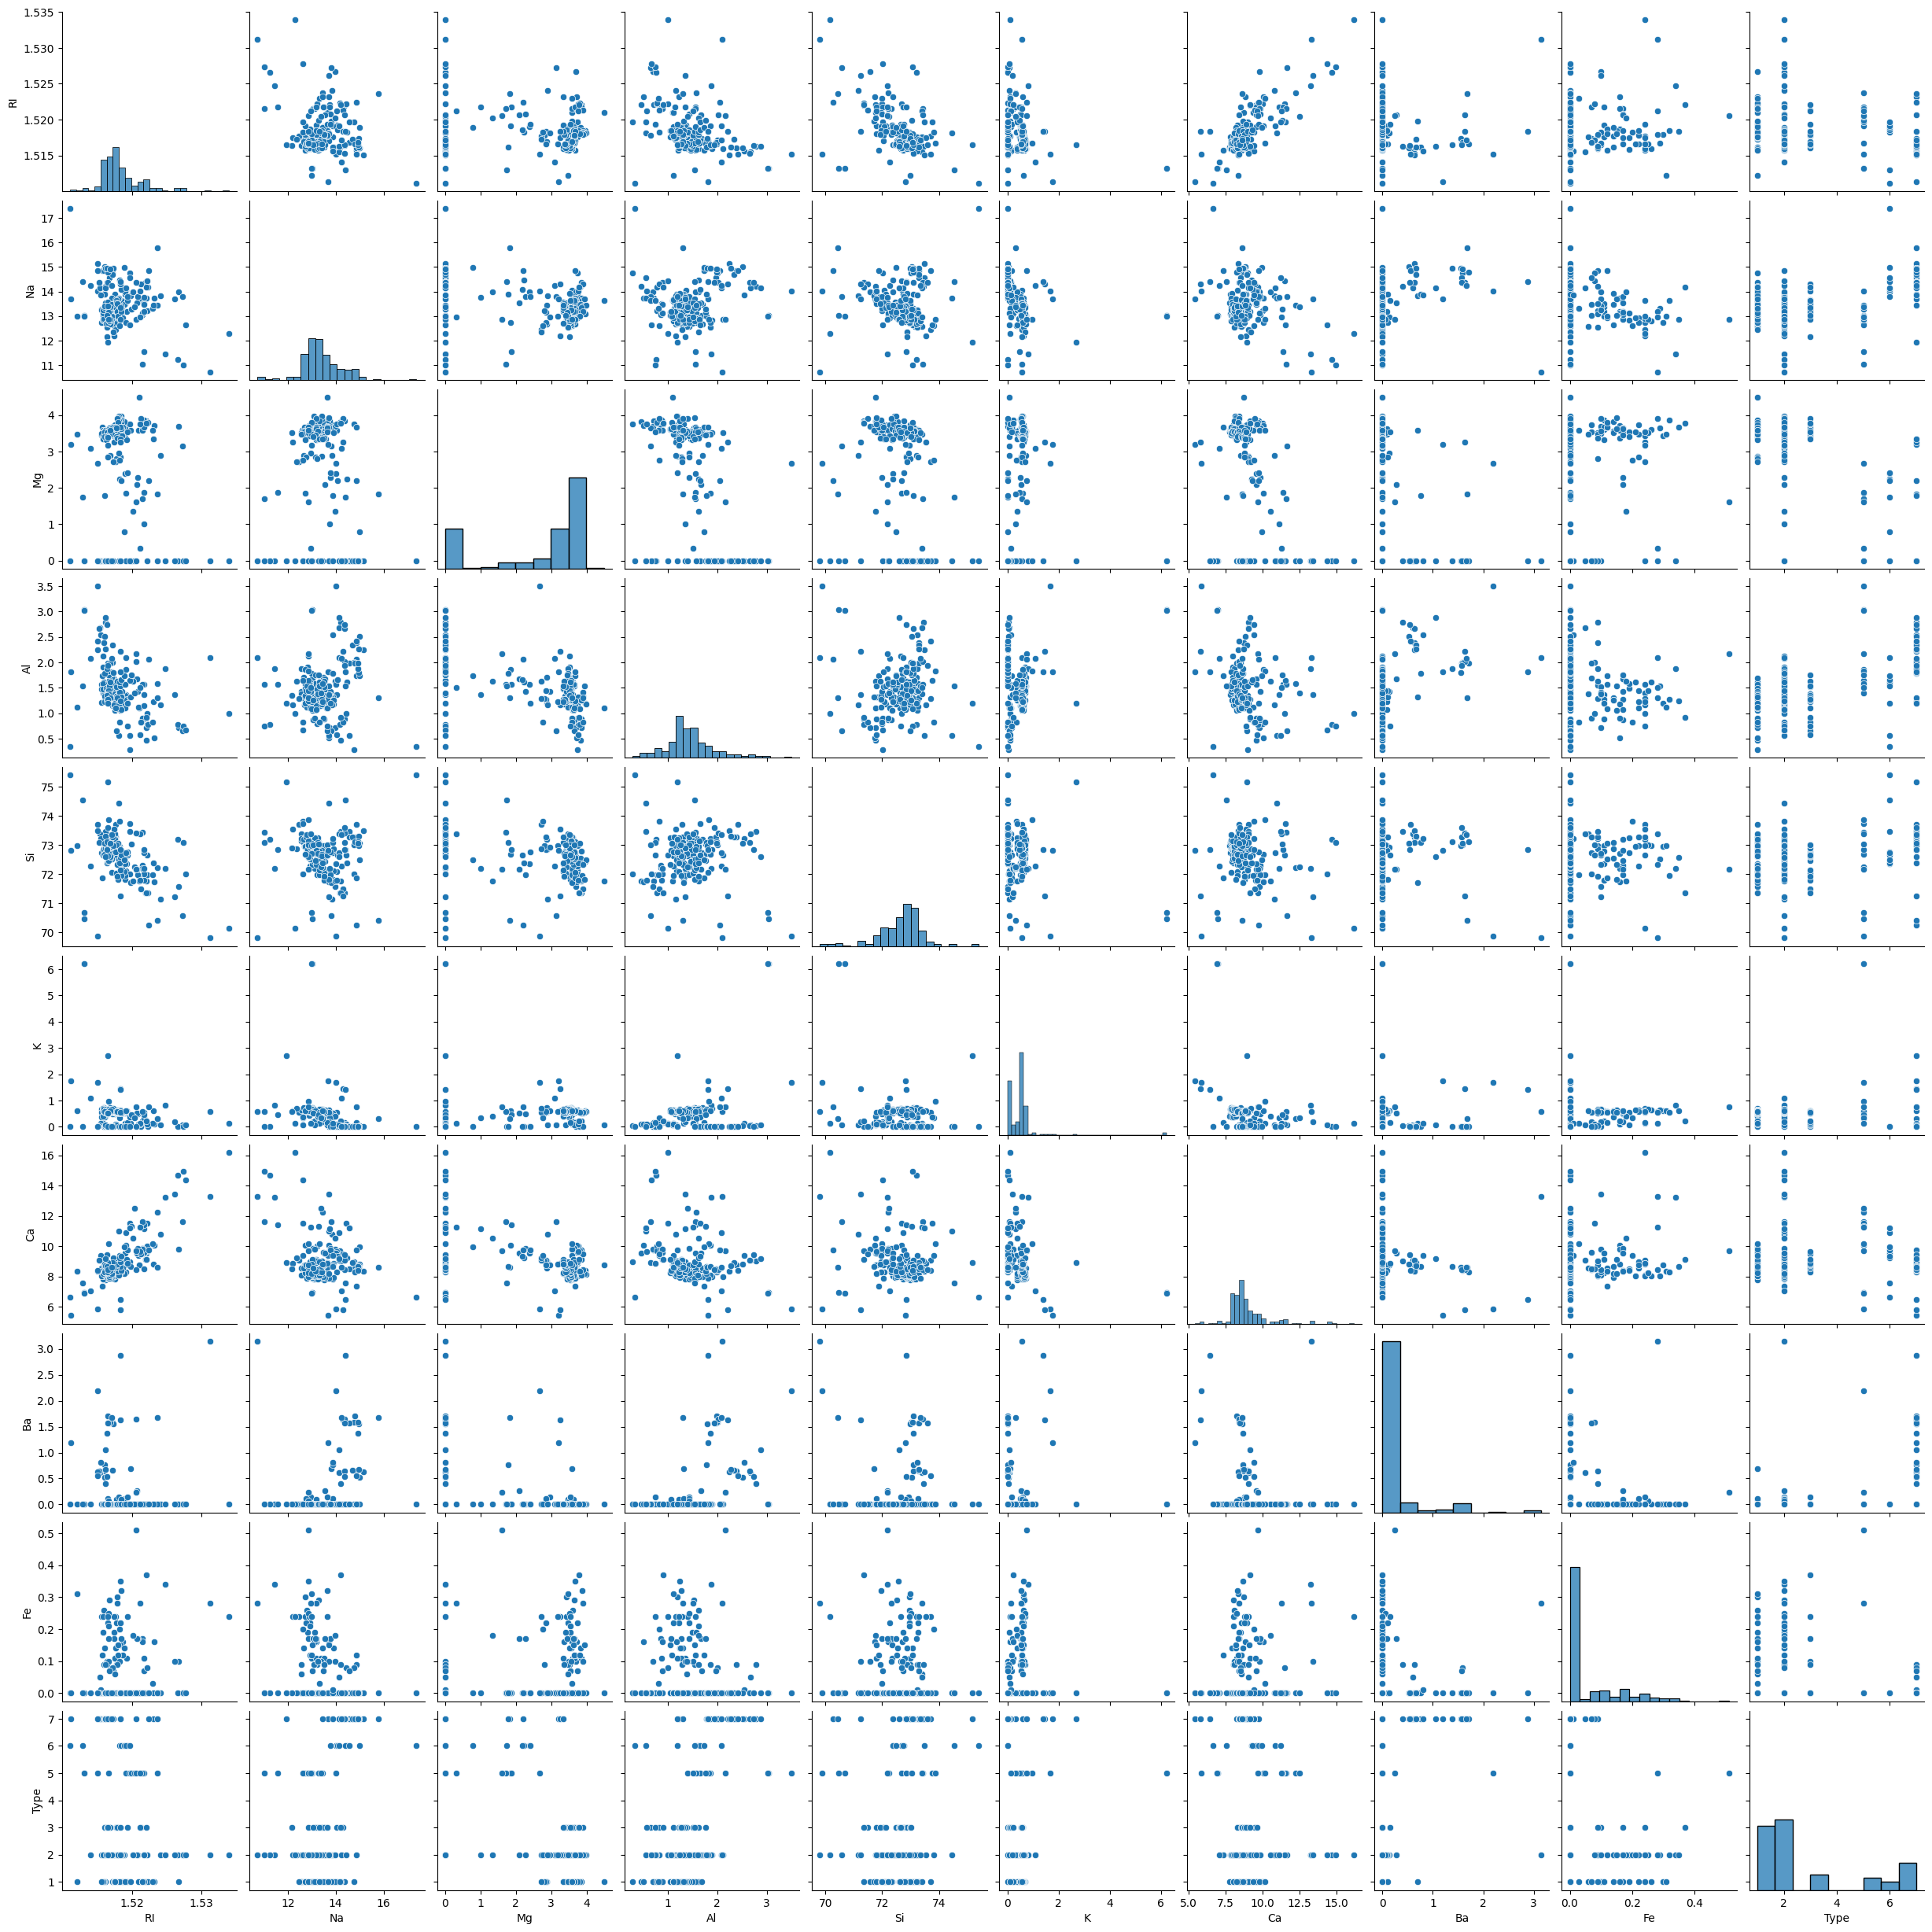

In [98]:
sns.pairplot(data)

<Axes: >

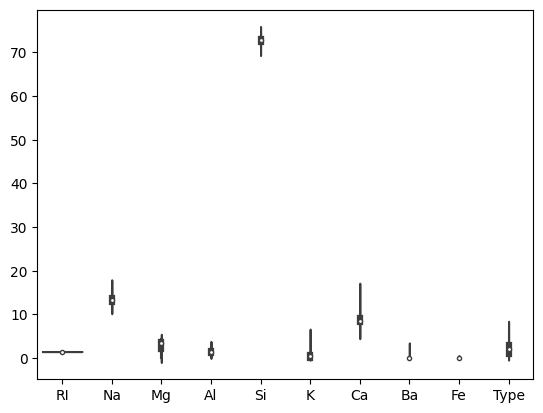

In [99]:
sns.violinplot(data )

In [100]:
#@title Bulid model

In [101]:
array=data.values
x=array[:,0:9]
y=array[:,9]

In [102]:
x

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [103]:
#normalized data
#Apply min max scaling
x=(x-x.min(axis=0))/(x.max(axis=0)-x.min(axis=0))
x

array([[0.43283582, 0.43759398, 1.        , ..., 0.30855019, 0.        ,
        0.        ],
       [0.28358209, 0.47518797, 0.80178174, ..., 0.22304833, 0.        ,
        0.        ],
       [0.22080773, 0.42105263, 0.79064588, ..., 0.21840149, 0.        ,
        0.        ],
       ...,
       [0.41703248, 0.54586466, 0.        , ..., 0.27973978, 0.52063492,
        0.        ],
       [0.23529412, 0.54887218, 0.        , ..., 0.28345725, 0.4984127 ,
        0.        ],
       [0.26163301, 0.52631579, 0.        , ..., 0.2964684 , 0.53015873,
        0.        ]])

In [104]:
num_fold=10
kfold=KFold(n_splits=10)

In [105]:
model=KNeighborsClassifier(n_neighbors=15)#k=15
results=cross_val_score(model,x,y,cv=kfold)

In [106]:
results

array([0.45454545, 0.68181818, 0.81818182, 0.95238095, 0.33333333,
       0.19047619, 0.33333333, 0.        , 0.14285714, 0.04761905])

In [107]:
print(results.mean())

0.3954545454545454


In [108]:
#@title Grid search for Algorithum

In [109]:
from sklearn.model_selection import GridSearchCV

In [110]:
n_neighbors=np.array([2*i+1 for i in range(0,20)])
param_grid=dict(n_neighbors=n_neighbors)

In [111]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [112]:
n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

In [113]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [114]:
print(grid.best_score_)
print(grid.best_params_)

0.6336655592469546
{'n_neighbors': 3}


In [115]:
#@title Visualizing the CV result
k_range=range(1,41)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

4     0.667316
3     0.657792
5     0.652597
2     0.643074
0     0.642641
1     0.629437
6     0.628788
21    0.620346
22    0.620130
7     0.619481
19    0.615152
20    0.615152
26    0.610606
25    0.610606
23    0.610606
9     0.610173
28    0.606061
37    0.602165
35    0.601732
32    0.601299
30    0.601082
29    0.601082
36    0.596970
13    0.596537
27    0.596537
18    0.596537
17    0.596320
24    0.592208
33    0.592208
16    0.591775
38    0.588095
31    0.587013
10    0.587013
8     0.586580
11    0.582035
39    0.578788
34    0.577922
14    0.577489
15    0.577273
12    0.567965
dtype: float64

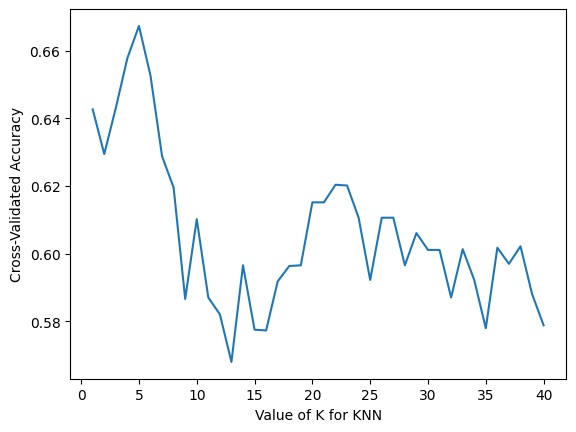

In [116]:
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [117]:
k_scores

[0.6426406926406926,
 0.6294372294372295,
 0.6430735930735931,
 0.6577922077922078,
 0.6673160173160173,
 0.6525974025974026,
 0.6287878787878789,
 0.6194805194805195,
 0.5865800865800865,
 0.6101731601731603,
 0.5870129870129869,
 0.5820346320346321,
 0.5679653679653679,
 0.5965367965367966,
 0.5774891774891776,
 0.5772727272727274,
 0.5917748917748918,
 0.5963203463203464,
 0.5965367965367966,
 0.6151515151515152,
 0.6151515151515152,
 0.6203463203463204,
 0.6201298701298702,
 0.6106060606060606,
 0.5922077922077923,
 0.6106060606060606,
 0.6106060606060606,
 0.5965367965367966,
 0.6060606060606062,
 0.6010822510822511,
 0.6010822510822511,
 0.5870129870129871,
 0.6012987012987013,
 0.5922077922077922,
 0.577922077922078,
 0.6017316017316018,
 0.596969696969697,
 0.6021645021645022,
 0.5880952380952381,
 0.5787878787878789]

In [118]:
data_accuracy=pd.DataFrame({'Value of k':range(1,41),
                            'Accuracy':k_scores})
data_accuracy

,Value of k,Accuracy
0,1,0.642641
1,2,0.629437
2,3,0.643074
3,4,0.657792
4,5,0.667316
5,6,0.652597
6,7,0.628788
7,8,0.619481
8,9,0.586580
9,10,0.610173


In [119]:
#@title 2.Zoo Dataset

In [120]:
zoo=pd.read_csv('Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [121]:
#@title Performing EDA

In [122]:
zoo.shape

(101, 18)

In [123]:
zoo=zoo.drop('animal name',axis=1)

In [125]:
zoo.shape

(101, 17)

In [151]:
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [153]:
zoo.shape

(101, 17)

In [127]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   hair      101 non-null    int64
 1   feathers  101 non-null    int64
 2   eggs      101 non-null    int64
 3   milk      101 non-null    int64
 4   airborne  101 non-null    int64
 5   aquatic   101 non-null    int64
 6   predator  101 non-null    int64
 7   toothed   101 non-null    int64
 8   backbone  101 non-null    int64
 9   breathes  101 non-null    int64
 10  venomous  101 non-null    int64
 11  fins      101 non-null    int64
 12  legs      101 non-null    int64
 13  tail      101 non-null    int64
 14  domestic  101 non-null    int64
 15  catsize   101 non-null    int64
 16  type      101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [128]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [129]:
#check null values
zoo.isnull().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

In [130]:
zoo.isna().sum()

hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

<Axes: >

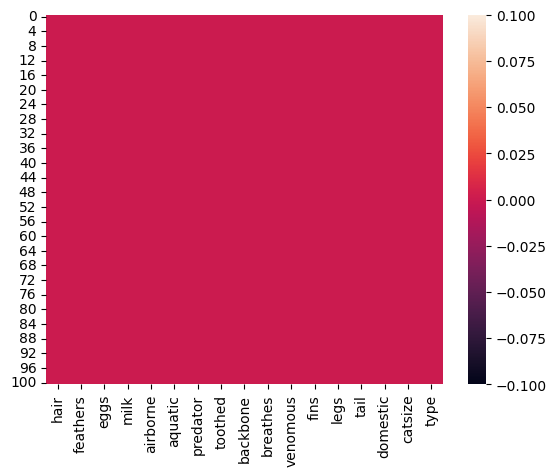

In [132]:
sns.heatmap(zoo.isna())

In [142]:
#check duplicated values
zoo.duplicated()

0      False
1      False
2      False
3       True
4      False
       ...  
96     False
97     False
98      True
99      True
100     True
Length: 101, dtype: bool

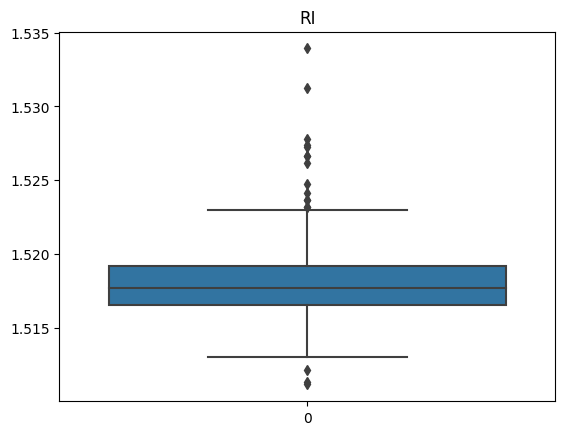

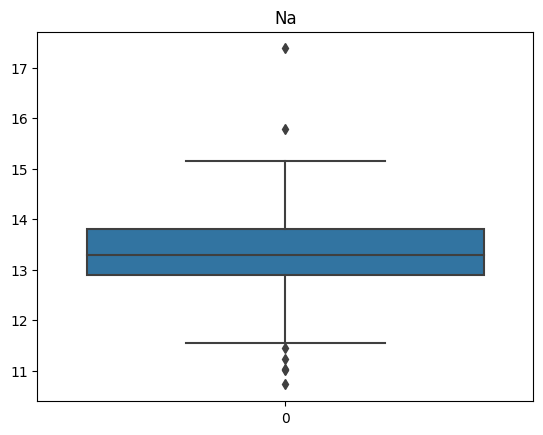

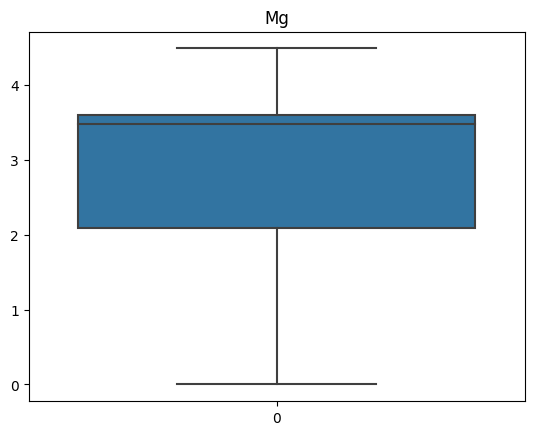

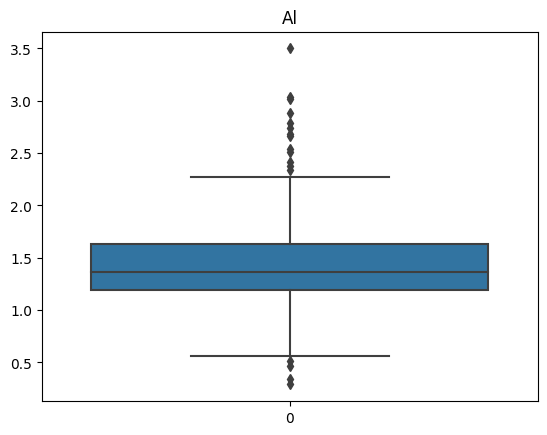

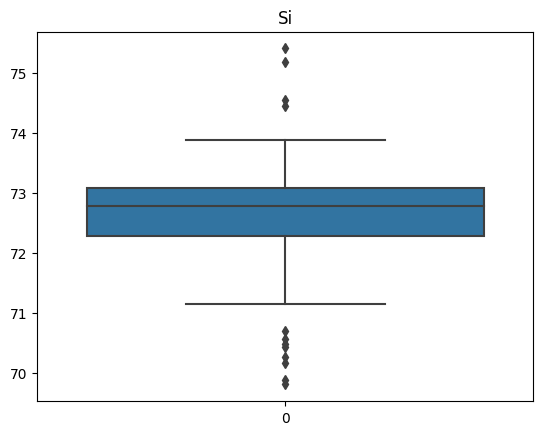

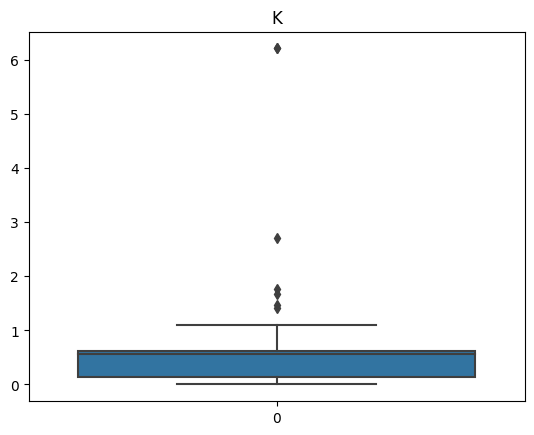

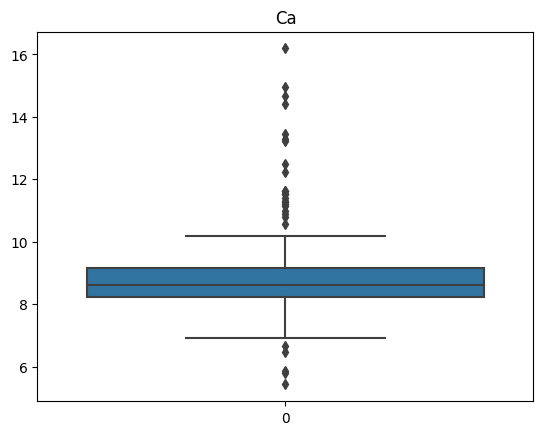

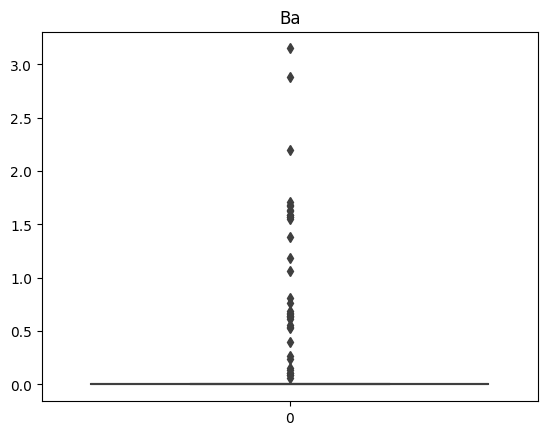

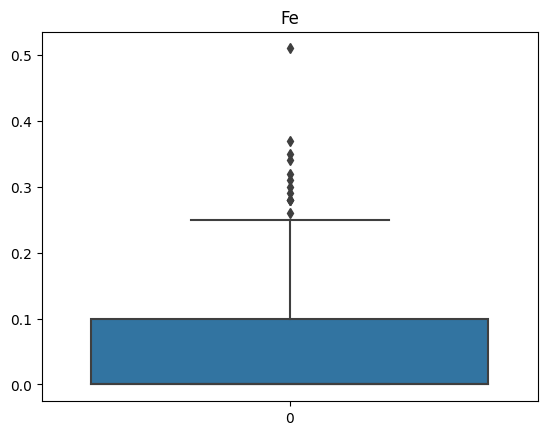

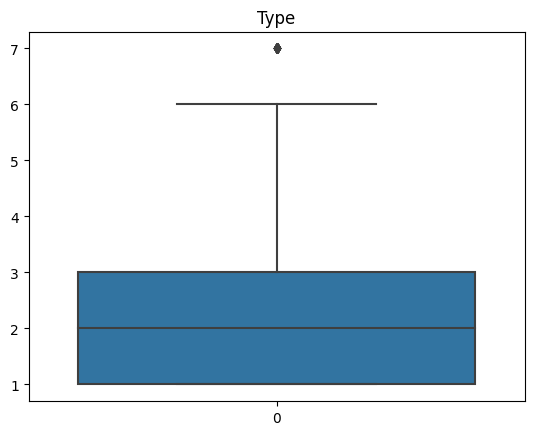

In [143]:
for i in data.columns:
  plt.title(i)
  sns.boxplot(data[i])
  plt.show()

In [138]:
zoo.corr()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


<Axes: >

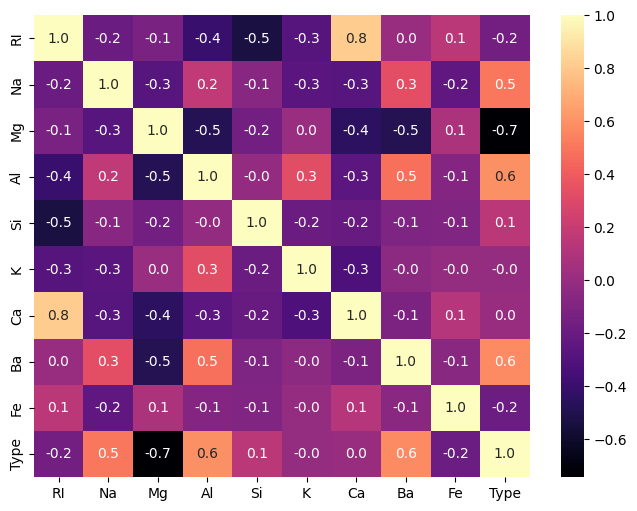

In [139]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),cmap='magma',annot=True,fmt='.1f')

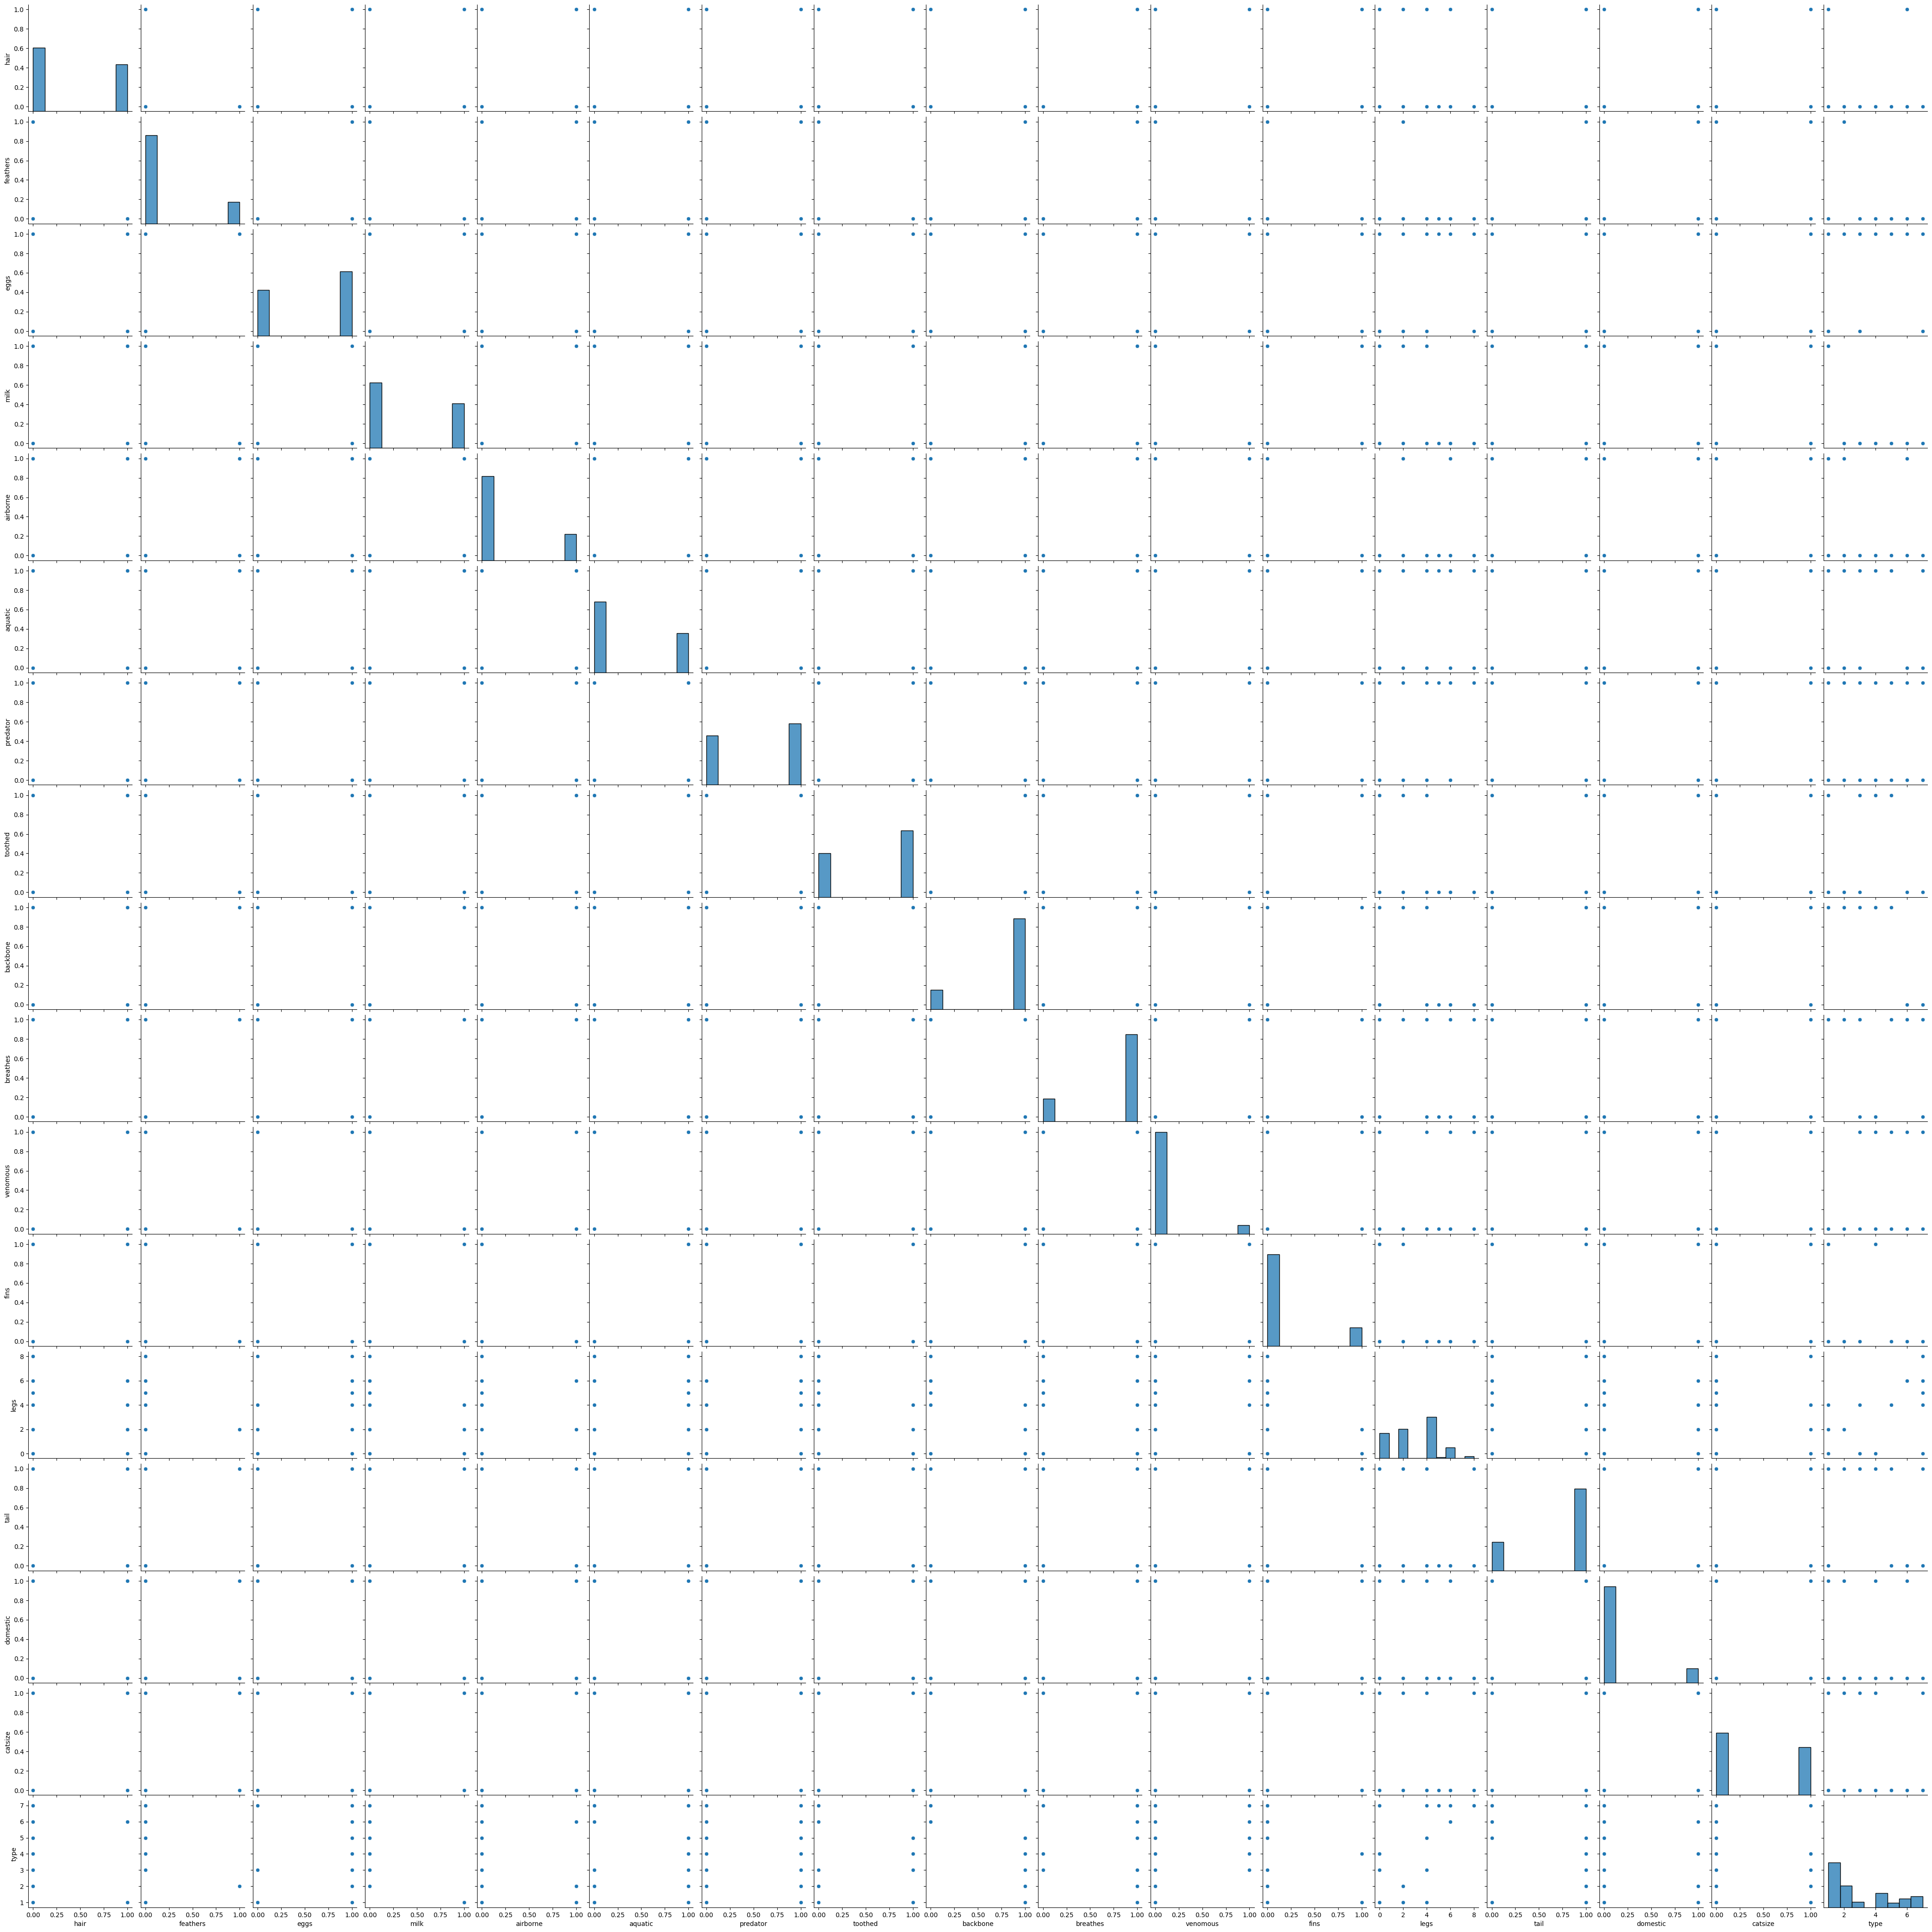

In [140]:
sns.pairplot(zoo)

array([[<Axes: title={'center': 'hair'}>,
        <Axes: title={'center': 'feathers'}>,
        <Axes: title={'center': 'eggs'}>,
        <Axes: title={'center': 'milk'}>],
       [<Axes: title={'center': 'airborne'}>,
        <Axes: title={'center': 'aquatic'}>,
        <Axes: title={'center': 'predator'}>,
        <Axes: title={'center': 'toothed'}>],
       [<Axes: title={'center': 'backbone'}>,
        <Axes: title={'center': 'breathes'}>,
        <Axes: title={'center': 'venomous'}>,
        <Axes: title={'center': 'fins'}>],
       [<Axes: title={'center': 'legs'}>,
        <Axes: title={'center': 'tail'}>,
        <Axes: title={'center': 'domestic'}>,
        <Axes: title={'center': 'catsize'}>],
       [<Axes: title={'center': 'type'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

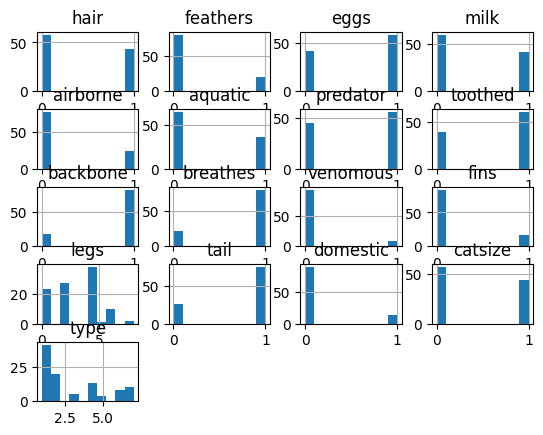

In [141]:
zoo.hist()

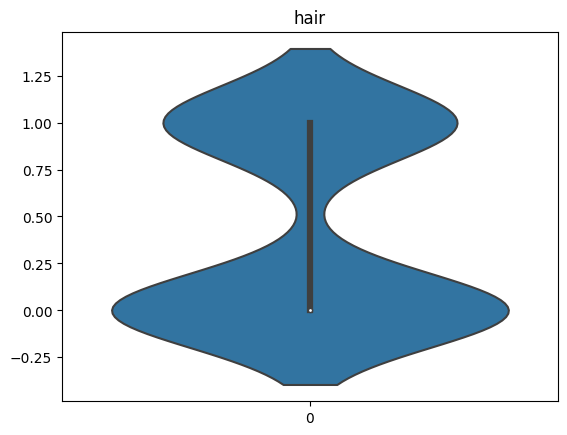

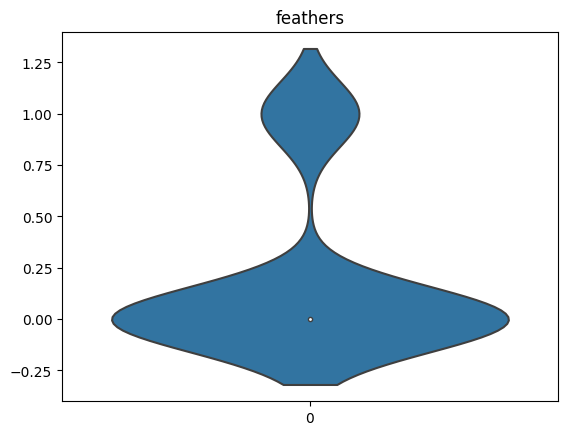

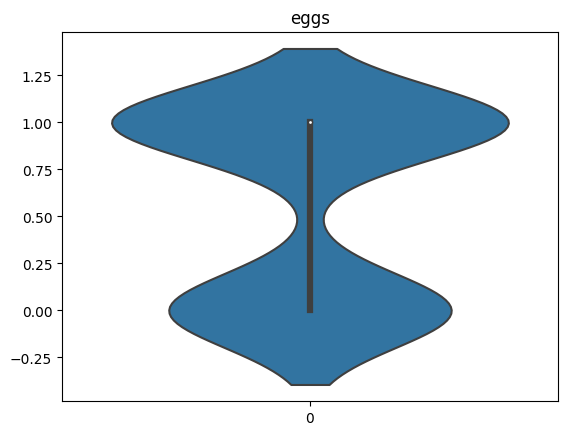

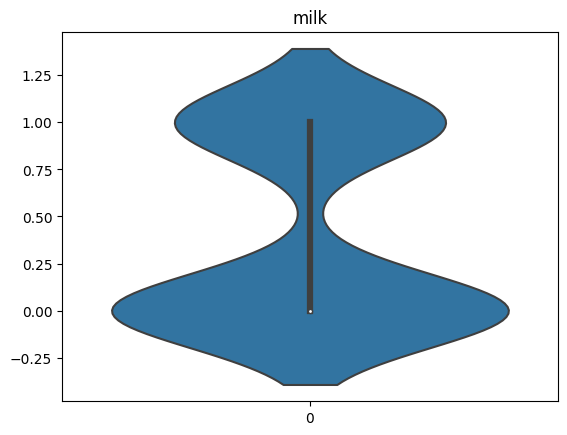

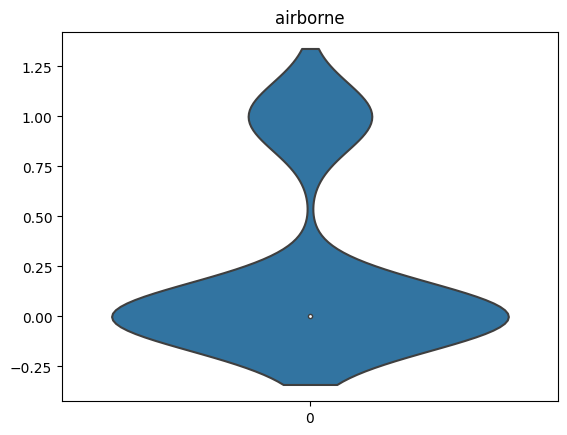

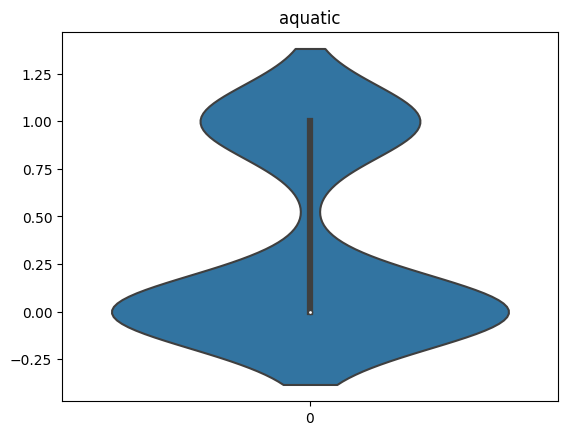

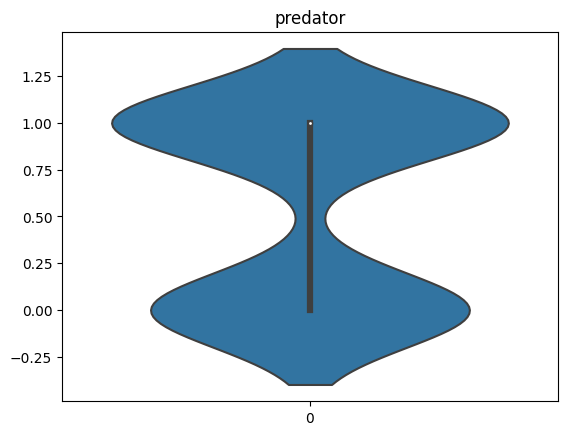

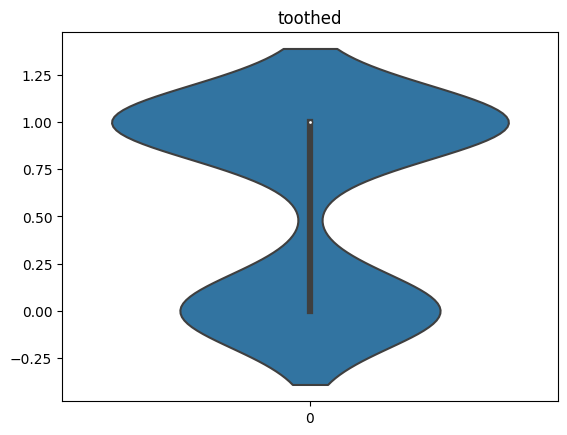

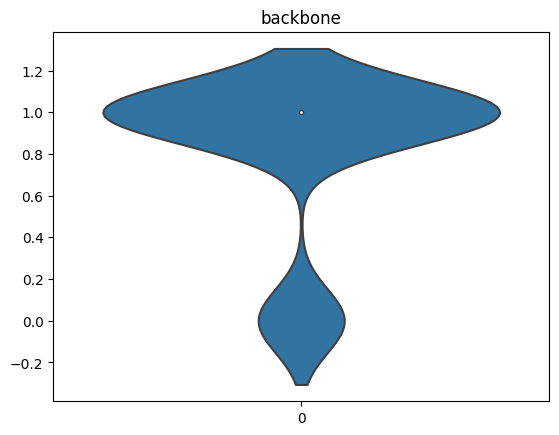

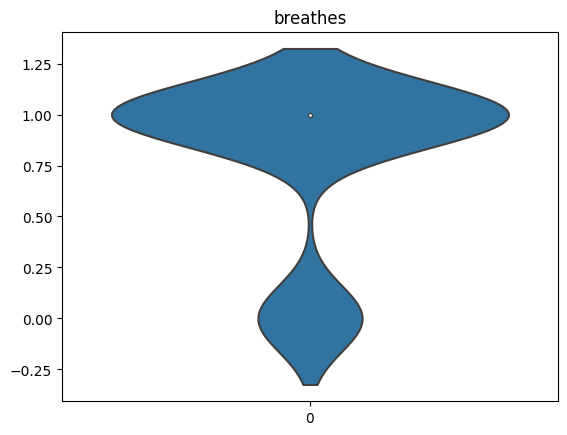

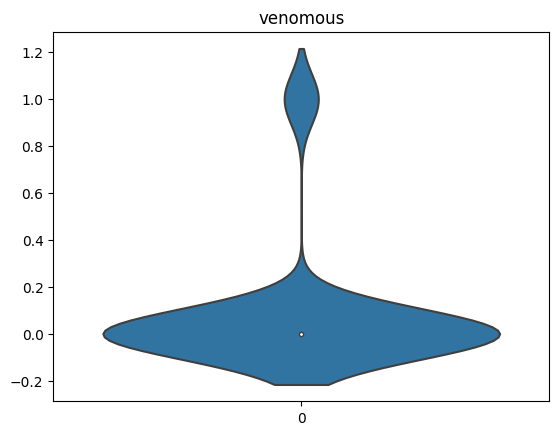

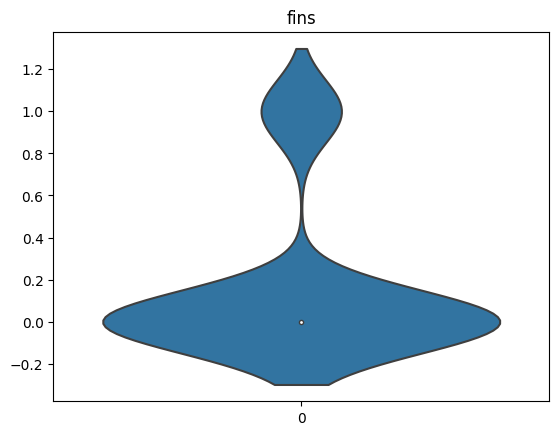

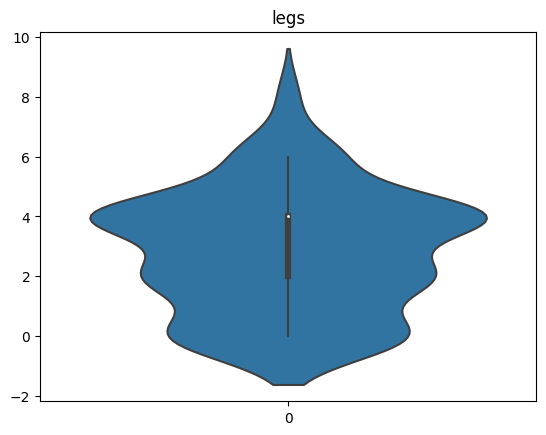

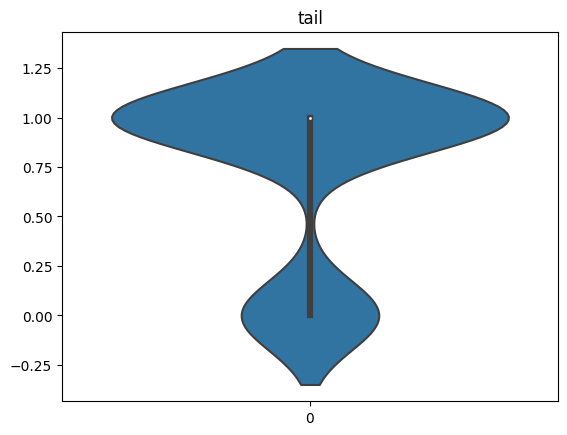

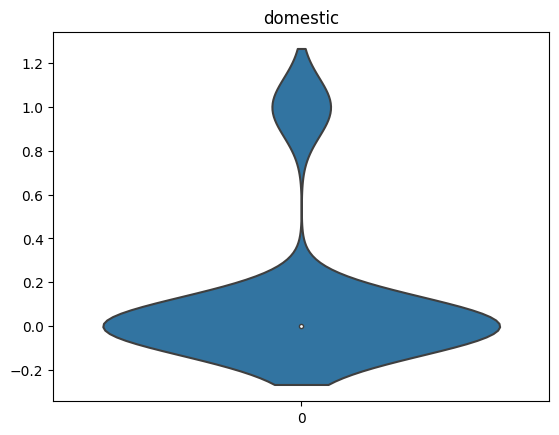

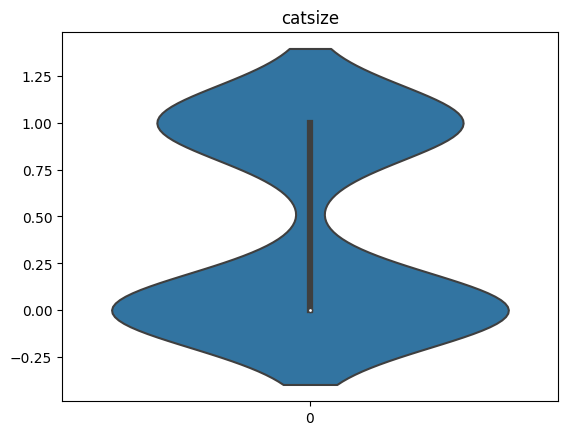

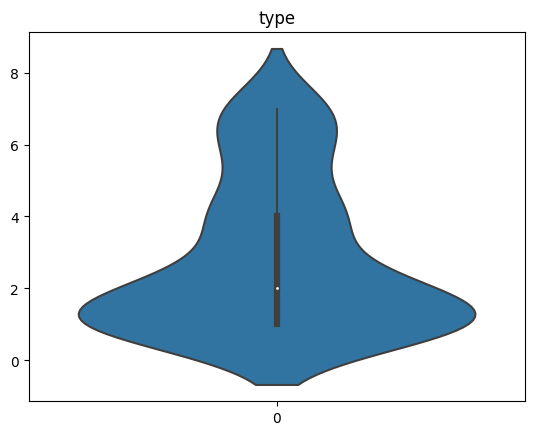

In [179]:
for i in zoo.columns:
  plt.title(i)
  sns.violinplot(zoo[i] )
  plt.show(i)


In [ ]:
#@title  KNN Built a model


In [156]:
x=zoo.iloc[:,0:17]
y=zoo.iloc[:,-1]

In [157]:
x

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [158]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: type, Length: 101, dtype: int64

In [160]:
num_fold=10
kfold=KFold(n_splits=10)

In [161]:
model1=KNeighborsClassifier(n_neighbors=17)
results=cross_val_score(model,x,y,cv=kfold)

In [162]:
results

array([1. , 0.8, 1. , 1. , 1. , 1. , 0.9, 0.8, 0.9, 0.9])

In [164]:
print(results.mean())

0.93


In [167]:
#@title Grid Search for Algorithm Tuning

from sklearn.model_selection import GridSearchCV


In [169]:
n_neighbors=np.array([2*i+1 for i in range(0,20)])
param_grid=dict(n_neighbors=n_neighbors)

In [170]:
n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

In [171]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [172]:
model1=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [173]:
print(grid.best_score_)
print(grid.best_params_)

1.0
{'n_neighbors': 1}


In [174]:
#@title Visualizing the CV result
k_range=range(1,41)
k_scores=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

pd.Series(k_scores).sort_values(ascending=False)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

0     1.000000
1     0.990000
2     0.960000
3     0.950000
4     0.940909
6     0.871818
5     0.861818
7     0.851818
8     0.851818
9     0.851818
22    0.841818
21    0.841818
19    0.831818
23    0.831818
18    0.821818
20    0.821818
16    0.811818
17    0.811818
15    0.811818
14    0.811818
13    0.811818
12    0.811818
11    0.811818
10    0.811818
24    0.811818
25    0.791818
26    0.771818
27    0.711818
28    0.681818
29    0.653636
30    0.613636
31    0.583636
32    0.573636
33    0.573636
34    0.573636
35    0.573636
36    0.573636
37    0.573636
38    0.544545
39    0.425455
dtype: float64

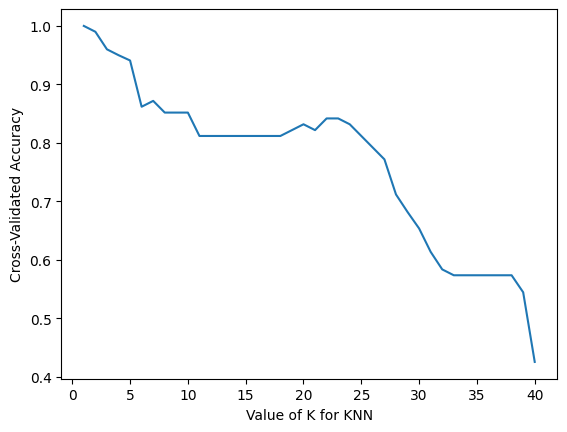

In [176]:
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [177]:
k_scores

[1.0,
 0.99,
 0.96,
 0.95,
 0.940909090909091,
 0.8618181818181819,
 0.8718181818181818,
 0.8518181818181819,
 0.8518181818181819,
 0.8518181818181819,
 0.8118181818181819,
 0.8118181818181819,
 0.8118181818181819,
 0.8118181818181819,
 0.8118181818181819,
 0.8118181818181819,
 0.8118181818181819,
 0.8118181818181819,
 0.8218181818181819,
 0.831818181818182,
 0.8218181818181819,
 0.8418181818181818,
 0.8418181818181818,
 0.8318181818181818,
 0.8118181818181819,
 0.7918181818181818,
 0.7718181818181817,
 0.7118181818181818,
 0.6818181818181819,
 0.6536363636363637,
 0.6136363636363635,
 0.5836363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5736363636363636,
 0.5445454545454546,
 0.4254545454545455]

In [178]:
zoo_accuracy = pd.DataFrame({'Value of k' : range(1,41),
                            'Accuracy' : k_scores})
zoo_accuracy

,Value of k,Accuracy
0,1,1.000000
1,2,0.990000
2,3,0.960000
3,4,0.950000
4,5,0.940909
5,6,0.861818
6,7,0.871818
7,8,0.851818
8,9,0.851818
9,10,0.851818
